In [37]:
import soundfile
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import numpy as np
from CountWords import CountWords
from pathlib import Path
import pandas as pd
import os
import statistics
import librosa
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import sklearn

# Pre-Processing the data 
speechDict = CountWords("data/LibriSpeech/dev-clean/84/121123/84-121123.trans.txt")

speech84_df = pd.DataFrame.from_dict(speechDict)
speech84_df['length'] = 0
speech84_df['rms'] = 0
speech84_df['var'] = 0
speech84_df['peaks'] = 0

dir = "data/LibriSpeech/dev-clean/84/121123"
for file in os.listdir("data/LibriSpeech/dev-clean/84/121123"):
    if file.endswith(".flac"):
        x, fs = soundfile.read(os.path.join(dir,file))

        S, phase = librosa.magphase(librosa.stft(x))
        rms = np.squeeze(librosa.feature.rms(S=S))

        peaks = signal.find_peaks(rms)[0]
        speech84_df.loc[speech84_df['file'] == file.split('.')[0], 'length'] = len(x)
        speech84_df.loc[speech84_df['file'] == file.split('.')[0], 'rms'] = np.sqrt(np.mean(x**2))
        speech84_df.loc[speech84_df['file'] == file.split('.')[0], 'var'] = statistics.variance(x)
        speech84_df.loc[speech84_df['file'] == file.split('.')[0], 'peaks'] = len(peaks)

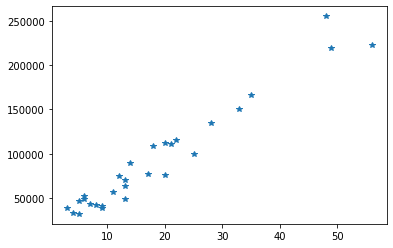

In [3]:
plt.plot(speech84_df['count'], speech84_df['length'], '*')
# pretty nice correlation here. This would be a really good feature

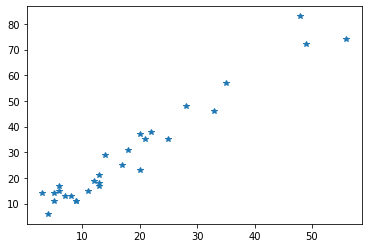

In [4]:
plt.plot(speech84_df['count'], speech84_df['peaks'], '*')
# pretty similar to length but slightly different. Might do a covariance matrix to see if this give us any new information

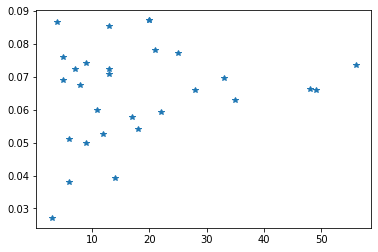

In [5]:
plt.plot(speech84_df['count'], speech84_df['rms'], '*')
# maybe not a great predictor but this might be valuable to make sure that the algorithm can't get spoofed just by making a long trace

In [38]:
# let train the linear regression to predict word count
cols = ['length', 'rms', 'peaks']
X_train = speech84_df[cols].values
X_train = sklearn.preprocessing.normalize(X_train)
y_train = speech84_df['count'].values

regressor = LinearRegression(normalize=True)  
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, cols, columns=['Coefficient'])  
coeff_df

,Coefficient
length,-1.504017e+09
rms,-1.593550e+07
peaks,-4.223799e+05


In [40]:
# test to see how we did
speechDict = CountWords("data/LibriSpeech/dev-clean/84/121550/84-121550.trans.txt")

speech84_test_df = pd.DataFrame.from_dict(speechDict)
speech84_test_df['length'] = 0
speech84_test_df['rms'] = 0
speech84_test_df['var'] = 0
speech84_test_df['peaks'] = 0

dir = "data/LibriSpeech/dev-clean/84/121550"
for file in os.listdir(dir):
    if file.endswith(".flac"):
        x, fs = soundfile.read(os.path.join(dir,file))

        S, phase = librosa.magphase(librosa.stft(x))
        rms = np.squeeze(librosa.feature.rms(S=S))

        peaks = signal.find_peaks(rms)[0]
        speech84_test_df.loc[speech84_test_df['file'] == file.split('.')[0], 'length'] = len(x)
        speech84_test_df.loc[speech84_test_df['file'] == file.split('.')[0], 'rms'] = np.sqrt(np.mean(x**2))
        speech84_test_df.loc[speech84_test_df['file'] == file.split('.')[0], 'var'] = statistics.variance(x)
        speech84_test_df.loc[speech84_test_df['file'] == file.split('.')[0], 'peaks'] = len(peaks)


In [41]:
speech84_test_df

,file,count,length,rms,var,peaks
0,84-121550-0000,24,134960,0.071076,0.005052,35
1,84-121550-0001,23,127600,0.067484,0.004554,36
2,84-121550-0002,21,132240,0.067650,0.004576,35
3,84-121550-0003,25,130560,0.070122,0.004917,35
4,84-121550-0004,21,127440,0.066318,0.004398,37
5,84-121550-0005,19,139439,0.066887,0.004474,36
6,84-121550-0006,21,141280,0.071613,0.005128,38
7,84-121550-0007,24,152400,0.063184,0.003992,35
8,84-121550-0008,22,135120,0.066487,0.004421,31
9,84-121550-0009,26,137840,0.067605,0.004570,35


In [47]:
cols = ['length', 'rms', 'peaks']
X_test = speech84_test_df[cols].values
X_test = sklearn.preprocessing.normalize(X_test)
y_pred = speech84_test_df['count'].values

y_test = regressor.predict(X_test)

print('MSE: ', metrics.mean_absolute_error(y_test, y_pred))
print(y_test)

MSE:  3.3464379840426974
[24.38444352 24.00277019 24.47369528 23.99298382 24.20444846 25.17120576
 24.45763922 27.79192019 26.57548404 25.15837812 24.66869354 25.74288845
 26.39405799 29.25911045 24.84787226 25.48808551 24.95168519 25.32897592
 28.94336915 26.08101559 26.61059141 25.05439854 23.63286066 23.5621891
 25.96329761 26.51760578 26.91257811 16.18661261 23.05807662 25.43980527
 26.02949166 26.00884342 25.75060463 24.34658813 26.79060984 23.8956995 ]
